# Banner logo
---
Draw banner logo using quadtree algorithm.

In [1]:
import numpy as np

## Useful functions
---

In [2]:
def display_svg(data):
    # Display SVG
    from IPython.display import SVG, display
    display(SVG(data))

## Quadtree algorithm
---

In [3]:
class Node():
    def __init__(self, x, y, dx, dy):
        self.x = x
        self.y = y
        self.dx = dx
        self.dy = dy
        self.children = []

In [4]:
class QTree():
    def __init__(self, width, height):
        dx, dy = width, height
        self.root = Node(0, 0, dx, dy)

    def subdivide(self, d_min, d_max, thrashold):
        recursive_subdivide(self.root, d_min, d_max, thrashold)

    def get_leaves(self):
        return find_leaves(self.root)

### Support functions
---

In [5]:
def divided_node(x, y, dx, dy):
    # Build divided node
    return Node(x, y, dx, dy)

def recursive_subdivide(node, d_min, d_max, thrashold):
    # Subdivide node by 4 if condition is satisfied
    x, y = node.x, node.y
    dx, dy = node.dx, node.dy

    if dx < d_min: return
    if dx < d_max:
        if np.random.random() < thrashold:
            return

    # Node 1
    x_, y_ = x, y
    dx_, dy_ = dx//2, dy//2
    n1 = Node(x_, y_, dx_, dy_)
    recursive_subdivide(n1, d_min, d_max, thrashold)

    # Node 2
    x_, y_ = x + dx//2, y
    dx_, dy_ = dx//2, dy//2
    n2 = Node(x_, y_, dx_, dy_)
    recursive_subdivide(n2, d_min, d_max, thrashold)

    # Node 3
    x_, y_ = x, y + dy//2
    dx_, dy_ = dx//2, dy//2
    n3 = Node(x_, y_, dx_, dy_)
    recursive_subdivide(n3, d_min, d_max, thrashold)

    # Node 4
    x_, y_ = x + dx//2, y + dy//2
    dx_, dy_ = dx//2, dy//2
    n4 = Node(x_, y_, dx_, dy_)
    recursive_subdivide(n4, d_min, d_max, thrashold)

    node.children = [n1, n2, n3, n4]

def find_leaves(node):
    # Find all leaves on the tree
    if not node.children:
        return [node]
    leaves = []
    for leaf in node.children:
        leaves += find_leaves(leaf)
    return leaves

## Image partition to SVG
---

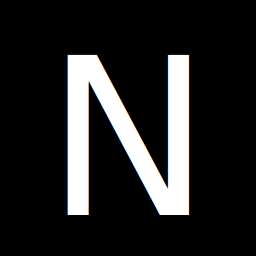

In [6]:
np.random.seed(1234)

# Input parameters
dx, dy = 256, 256

# Init SVG
SVG = f'''<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" 
    "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd"
>
<svg id="image"
    width="{dx}px" height="{dy}px" 
    xmlns="http://www.w3.org/2000/svg"
    xmlns:xlink="http://www.w3.org/1999/xlink"
>
'''

SVG += "  <style>\n"

SVG += """    @keyframes hover-color {
      0% {
        fill: white;
      }

      17% {
        fill: hsl(117, 70%, 50%);
      }

      33% {
        fill: hsl(189, 70%, 50%);
      }

      50% {
        fill: hsl(261, 70%, 50%);
      }

      66% {
        fill: hsl(333, 70%, 50%);
      }

      83% {
        fill: hsl(45, 90%, 50%);
      }

      100% {
        fill: white;
      }
    }
    
    rect {
      animation-name: hover-color;
      animation-iteration-count: infinite;
    }\n
"""

for i in range(10):
    t = 5 + np.random.random()*10
    SVG += f'    .duration{i + 1} {{animation-duration: {t:.04f}s;}}\n'

SVG += "\n"

for i in range(10):
    t = np.random.random()*15
    SVG += f'    .delay{i + 1} {{animation-delay: -{t:.04f}s;}}\n'

SVG += """
    text {
      font-family: Impact, Haettenschweiler, 'Arial Narrow Bold', sans-serif;
      font-size: 220px;
      text-anchor: middle;
      fill: white;
    }
"""

SVG += "  </style>\n"

# Run quadtree algorithm
tree = QTree(dx, dy)
tree.subdivide(16, 64, 0.25)

leaves = tree.get_leaves()

# Draw leaves
for leaf in leaves:
    x, y = leaf.x, leaf.y
    w, h = leaf.dx, leaf.dy
    r, g, b = np.random.randint(255), np.random.randint(255), np.random.randint(255)
    classes = f'duration{np.random.randint(10) + 1} delay{np.random.randint(10) + 1}'
    SVG += f'  <rect class="{classes}" x="{x}" y="{y}" width="{w}" height="{h}" />\n'

SVG += '<text x="128" y="215">N</text>\n'

SVG += '</svg>\n'

display_svg(SVG)

In [7]:
f = open(f'banner_logo.svg', "w")
f.write(SVG)
f.close()